In [1]:
# Step 1: Install the necessary libraries
!pip install transformers
!pip install torch torchvision
!pip install pillow

In [2]:
# Step 2: Import the necessary modules
from transformers import pipeline
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Step 3: Create an image segmentation pipeline
image_segmenter = pipeline(task="image-segmentation")

No model was supplied, defaulted to facebook/detr-resnet-50-panoptic and revision d53b52a (https://huggingface.co/facebook/detr-resnet-50-panoptic).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/11.6k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/172M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50-panoptic were not used when initializing DetrForSegmentation: ['detr.model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'detr.model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

In [9]:
# Step 4: Define the image you want to segment
image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/f/f0/2018_IMG_8253_Helsinki%2C_Finland_%2840249531641%29_%28cropped%29.jpg/800px-2018_IMG_8253_Helsinki%2C_Finland_%2840249531641%29_%28cropped%29.jpg"
image = Image.open(requests.get(image_url, stream=True).raw)

In [10]:
# Step 5: Perform image segmentation
results = image_segmenter(image)

(-0.5, 799.5, 971.5, -0.5)

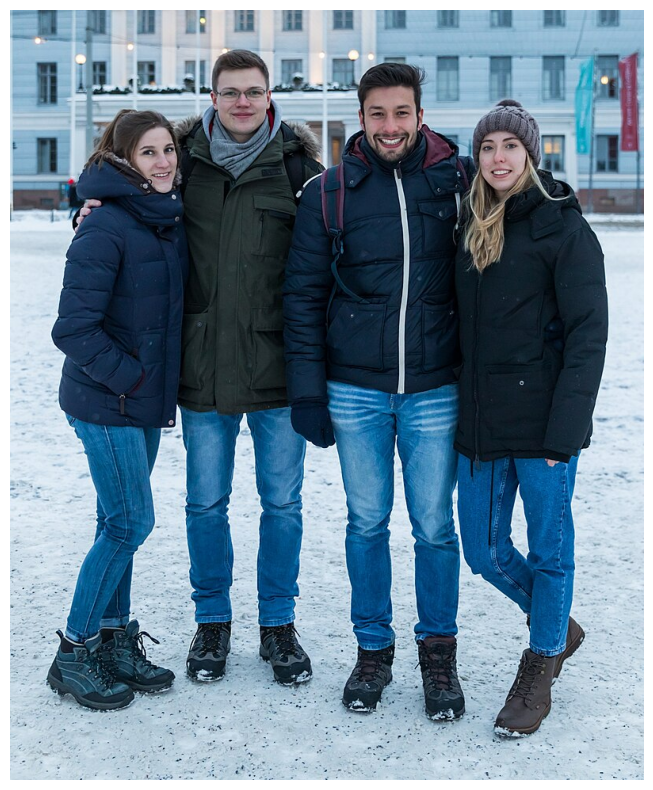

In [11]:
# Step 6: Display the segmentation results
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

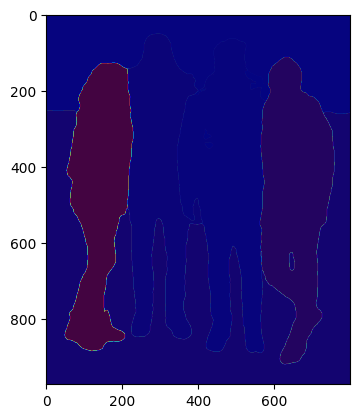

In [12]:
# Overlay the segmentation masks with different colors
for result in results:
    mask = np.array(result['mask'])
    plt.imshow(mask, alpha=0.5, cmap='jet')

plt.show()